In [52]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")

# print("Path to dataset files:", path)

In [1]:
import os 
path = "data/bronze"
data_path = os.path.join(path,"survey.csv")
data_path

'data/bronze\\survey.csv'

In [2]:
import pandas as pd 
df = pd.read_csv(data_path)

In [3]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [4]:
df.drop_duplicates(inplace=True)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
columns = df.columns
len_of_col = len(columns)
len_of_dataset = len(df)
print(f"Number of columns: {len_of_col}")
print(f"Number of rows: {len_of_dataset}")
print(f"Columns: {columns}")
df.info()

Number of columns: 27
Number of rows: 1259
Columns: Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   

In [6]:
na_value_check = df.isna().sum()

In [7]:
na_value_check

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

# Dropping unwanted columns

In [8]:
df.drop(columns=['Timestamp'], inplace=True)

In [9]:
df.drop(columns=['Timestamp','comments','state','Country' ,'no_employees'],inplace=True)

# Split the Numerical and Categorical values 

### Categorical 

In [10]:
# getting categorical values
categorical = df.select_dtypes(include=['object'])
categorical_columns = categorical.columns

In [11]:
categorical_columns

Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [12]:
df["Gender"].value_counts()
    

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [13]:
categorical_columns = df.select_dtypes(include=["object"]).columns

In [14]:
def clean_gender(gender):
    gender = str(gender).strip().lower()
    male_variants = ["m", "male", "man", "cis male", "cis man", "maile", "mal", "malr", "male (cis)", "guy (-ish) ^_^", "male-ish", "maile" ,"msle", "mail", "malr"]
    female_variants = ["f", "female", "woman", "cis female", "cis-female/femme", "female (cis)", "femake", "trans woman", "female (trans)"]
    non_binary_variants = [
        "non-binary", "genderqueer", "fluid", "androgyne", "agender", "enby", "queer/she/they", "something kinda male?",
        "ostensibly male, unsure what that really means", "male leaning androgynous"
    ]
    
    if gender in male_variants:
        return "Male"
    elif gender in female_variants:
        return "Female"
    elif gender in non_binary_variants:
        return "Non-binary"
    elif gender in {"nah", "all", "a little about you", "p"}:
        return "Unknown"
    else:
        return "Other"

In [15]:
df["Gender"] = df["Gender"].apply(clean_gender)

In [16]:
df["Gender"].value_counts()

Gender
Male          988
Female        249
Non-binary     10
Other           8
Unknown         4
Name: count, dtype: int64

<Axes: xlabel='Gender'>

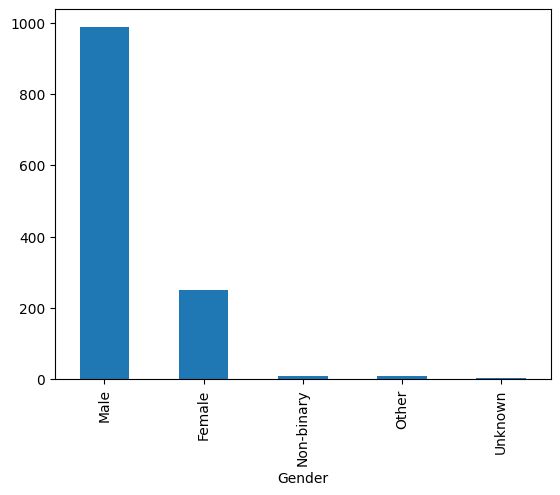

In [17]:
df["Gender"].value_counts().plot(kind='bar')

In [18]:
index_list = []
for index , gender in enumerate(df["Gender"]):
    if gender in ["Unknown" ,"Other","Non-binary/Other"]:
        index_list.append(index)

In [19]:
index_list

[72, 382, 387, 390, 462, 569, 571, 777, 818, 989, 1127, 1185]

In [20]:
df.drop(axis=0,index=index_list,inplace=True)

In [21]:
len(df)

1247

In [22]:
df["Gender"].value_counts()

Gender
Male          988
Female        249
Non-binary     10
Name: count, dtype: int64

In [23]:
df.describe()

,Age
count,1247.000000
mean,30.827586
std,51.056667
min,-1726.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,329.000000


In [24]:
min(df["Age"]), max(df["Age"])

(-1726, 329)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1247 non-null   int64 
 1   Gender                     1247 non-null   object
 2   self_employed              1229 non-null   object
 3   family_history             1247 non-null   object
 4   treatment                  1247 non-null   object
 5   work_interfere             983 non-null    object
 6   remote_work                1247 non-null   object
 7   tech_company               1247 non-null   object
 8   benefits                   1247 non-null   object
 9   care_options               1247 non-null   object
 10  wellness_program           1247 non-null   object
 11  seek_help                  1247 non-null   object
 12  anonymity                  1247 non-null   object
 13  leave                      1247 non-null   object
 14  mental_health

In [26]:
df.isna().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [27]:
df["work_interfere"].value_counts()

work_interfere
Sometimes    459
Never        212
Rarely       172
Often        140
Name: count, dtype: int64

In [28]:
df["self_employed"] =df["self_employed"].fillna(df["self_employed"].mode()[0])
df["work_interfere"]= df["work_interfere"].fillna(df["work_interfere"].mode()[0])

In [29]:
df["self_employed"].value_counts()

self_employed
No     1106
Yes     141
Name: count, dtype: int64

In [30]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [31]:
df.isna().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

<Axes: >

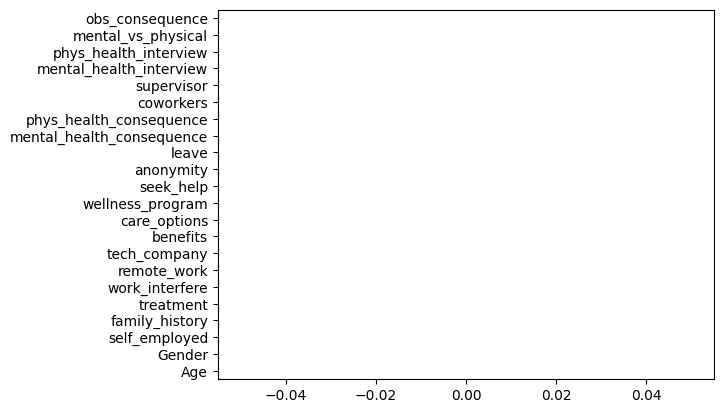

In [32]:
((df.isna().sum()/len(df))*100).plot(kind='barh')

In [33]:
for col in categorical_columns:
    print(f"{col} : {df[col].unique()}")

Gender : ['Female' 'Male' 'Non-binary']
self_employed : ['No' 'Yes']
family_history : ['No' 'Yes']
treatment : ['Yes' 'No']
work_interfere : ['Often' 'Rarely' 'Never' 'Sometimes']
remote_work : ['No' 'Yes']
tech_company : ['Yes' 'No']
benefits : ['Yes' "Don't know" 'No']
care_options : ['Not sure' 'No' 'Yes']
wellness_program : ['No' "Don't know" 'Yes']
seek_help : ['Yes' "Don't know" 'No']
anonymity : ['Yes' "Don't know" 'No']
leave : ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_health_consequence : ['No' 'Maybe' 'Yes']
phys_health_consequence : ['No' 'Yes' 'Maybe']
coworkers : ['Some of them' 'No' 'Yes']
supervisor : ['Yes' 'No' 'Some of them']
mental_health_interview : ['No' 'Yes' 'Maybe']
phys_health_interview : ['Maybe' 'No' 'Yes']
mental_vs_physical : ['Yes' "Don't know" 'No']
obs_consequence : ['No' 'Yes']


### Numerical

In [34]:
# getting categorical values
numerical = df.select_dtypes(exclude=['object'])
numerical_columns = numerical.columns

In [35]:
numerical_columns

Index(['Age'], dtype='object')

In [36]:
import pandas as pd
import numpy as np

def remove_outliers_iqr(df, columns):
    """
    Removes outliers using the IQR method.
    
    Parameters:
        df (pd.DataFrame): The input dataframe
        columns (list): List of numerical columns to check for outliers
        
    Returns:
        pd.DataFrame: DataFrame without outliers
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df = remove_outliers_iqr(df, numerical_columns)


In [37]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [38]:
df.describe()

,Age
count,1210.000000
mean,31.474380
std,6.280308
min,18.000000
25%,27.000000
50%,31.000000
75%,35.000000
max,49.000000


In [39]:
df.dtypes

Age                           int64
Gender                       object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [41]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
df["treatment"] = df["treatment"].replace({"Yes":1 , "No":0})
df_new = df.drop(columns=["treatment"])
categorical = df_new.select_dtypes(include=['object'])
numerical = df_new.select_dtypes(exclude=['object'])
categorical_columns = list(categorical.columns)
numerical_columns = list(numerical.columns)
column_transformer = ColumnTransformer(
    transformers=[
        ("cat_encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_columns),
        ("num_scaler", MinMaxScaler(), numerical_columns)
    ],
    remainder='passthrough',
    force_int_remainder_cols=False 
)
pipeline = Pipeline(steps=[
    ("transform", column_transformer)
])
pipeline.fit(df_new)

Pipeline(steps=[('transform',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender', 'self_employed',
                                                   'family_history',
                                                   'work_interfere',
                                                   'remote_work',
                                                   'tech_company', 'benefits',
                                                   'care_options',
                                                   'wellness_program',
                                                   'seek_help', 'anonymity',
                                                   'leave',
                                                   'mental_health_consequence',
                                                   'phys_health_consequence',
                                                   'coworkers', 'supervisor',
                                                   'mental_health_interview',
                                                   'phys_health_interview',
                                                   'mental_vs_physical',
                                                   'obs_consequence']),
                                                 ('num_scaler', MinMaxScaler(),
                                                  ['Age'])]))])

## Split the target and features 

In [42]:
categorical_columns 

['Gender',
 'self_employed',
 'family_history',
 'work_interfere',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [43]:
df_new

,Age,Gender,self_employed,family_history,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Often,No,Yes,Yes,Not sure,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,Rarely,No,No,Don't know,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,Rarely,No,Yes,No,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Often,No,Yes,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,Never,Yes,Yes,Yes,No,Don't know,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,No,No,Sometimes,No,Yes,No,No,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Often,Yes,Yes,Yes,Yes,No,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,No,Yes,Sometimes,No,Yes,Yes,Yes,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,No,No,Sometimes,Yes,Yes,No,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [44]:
len(df_new.columns) , categorical_columns+ numerical_columns

(21,
 ['Gender',
  'self_employed',
  'family_history',
  'work_interfere',
  'remote_work',
  'tech_company',
  'benefits',
  'care_options',
  'wellness_program',
  'seek_help',
  'anonymity',
  'leave',
  'mental_health_consequence',
  'phys_health_consequence',
  'coworkers',
  'supervisor',
  'mental_health_interview',
  'phys_health_interview',
  'mental_vs_physical',
  'obs_consequence',
  'Age'])

In [45]:
# df_new = df.drop(columns=["treatment"])
transformed_data = pipeline.transform(df_new)
transformed_df = pd.DataFrame(transformed_data, columns = categorical_columns + numerical_columns)

In [46]:
transformed_df

,Gender,self_employed,family_history,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.612903
1,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.838710
2,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.451613
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,...,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.419355
4,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.419355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.258065
1206,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.451613
1207,1.0,0.0,1.0,3.0,0.0,1.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.516129
1208,0.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,...,0.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.903226


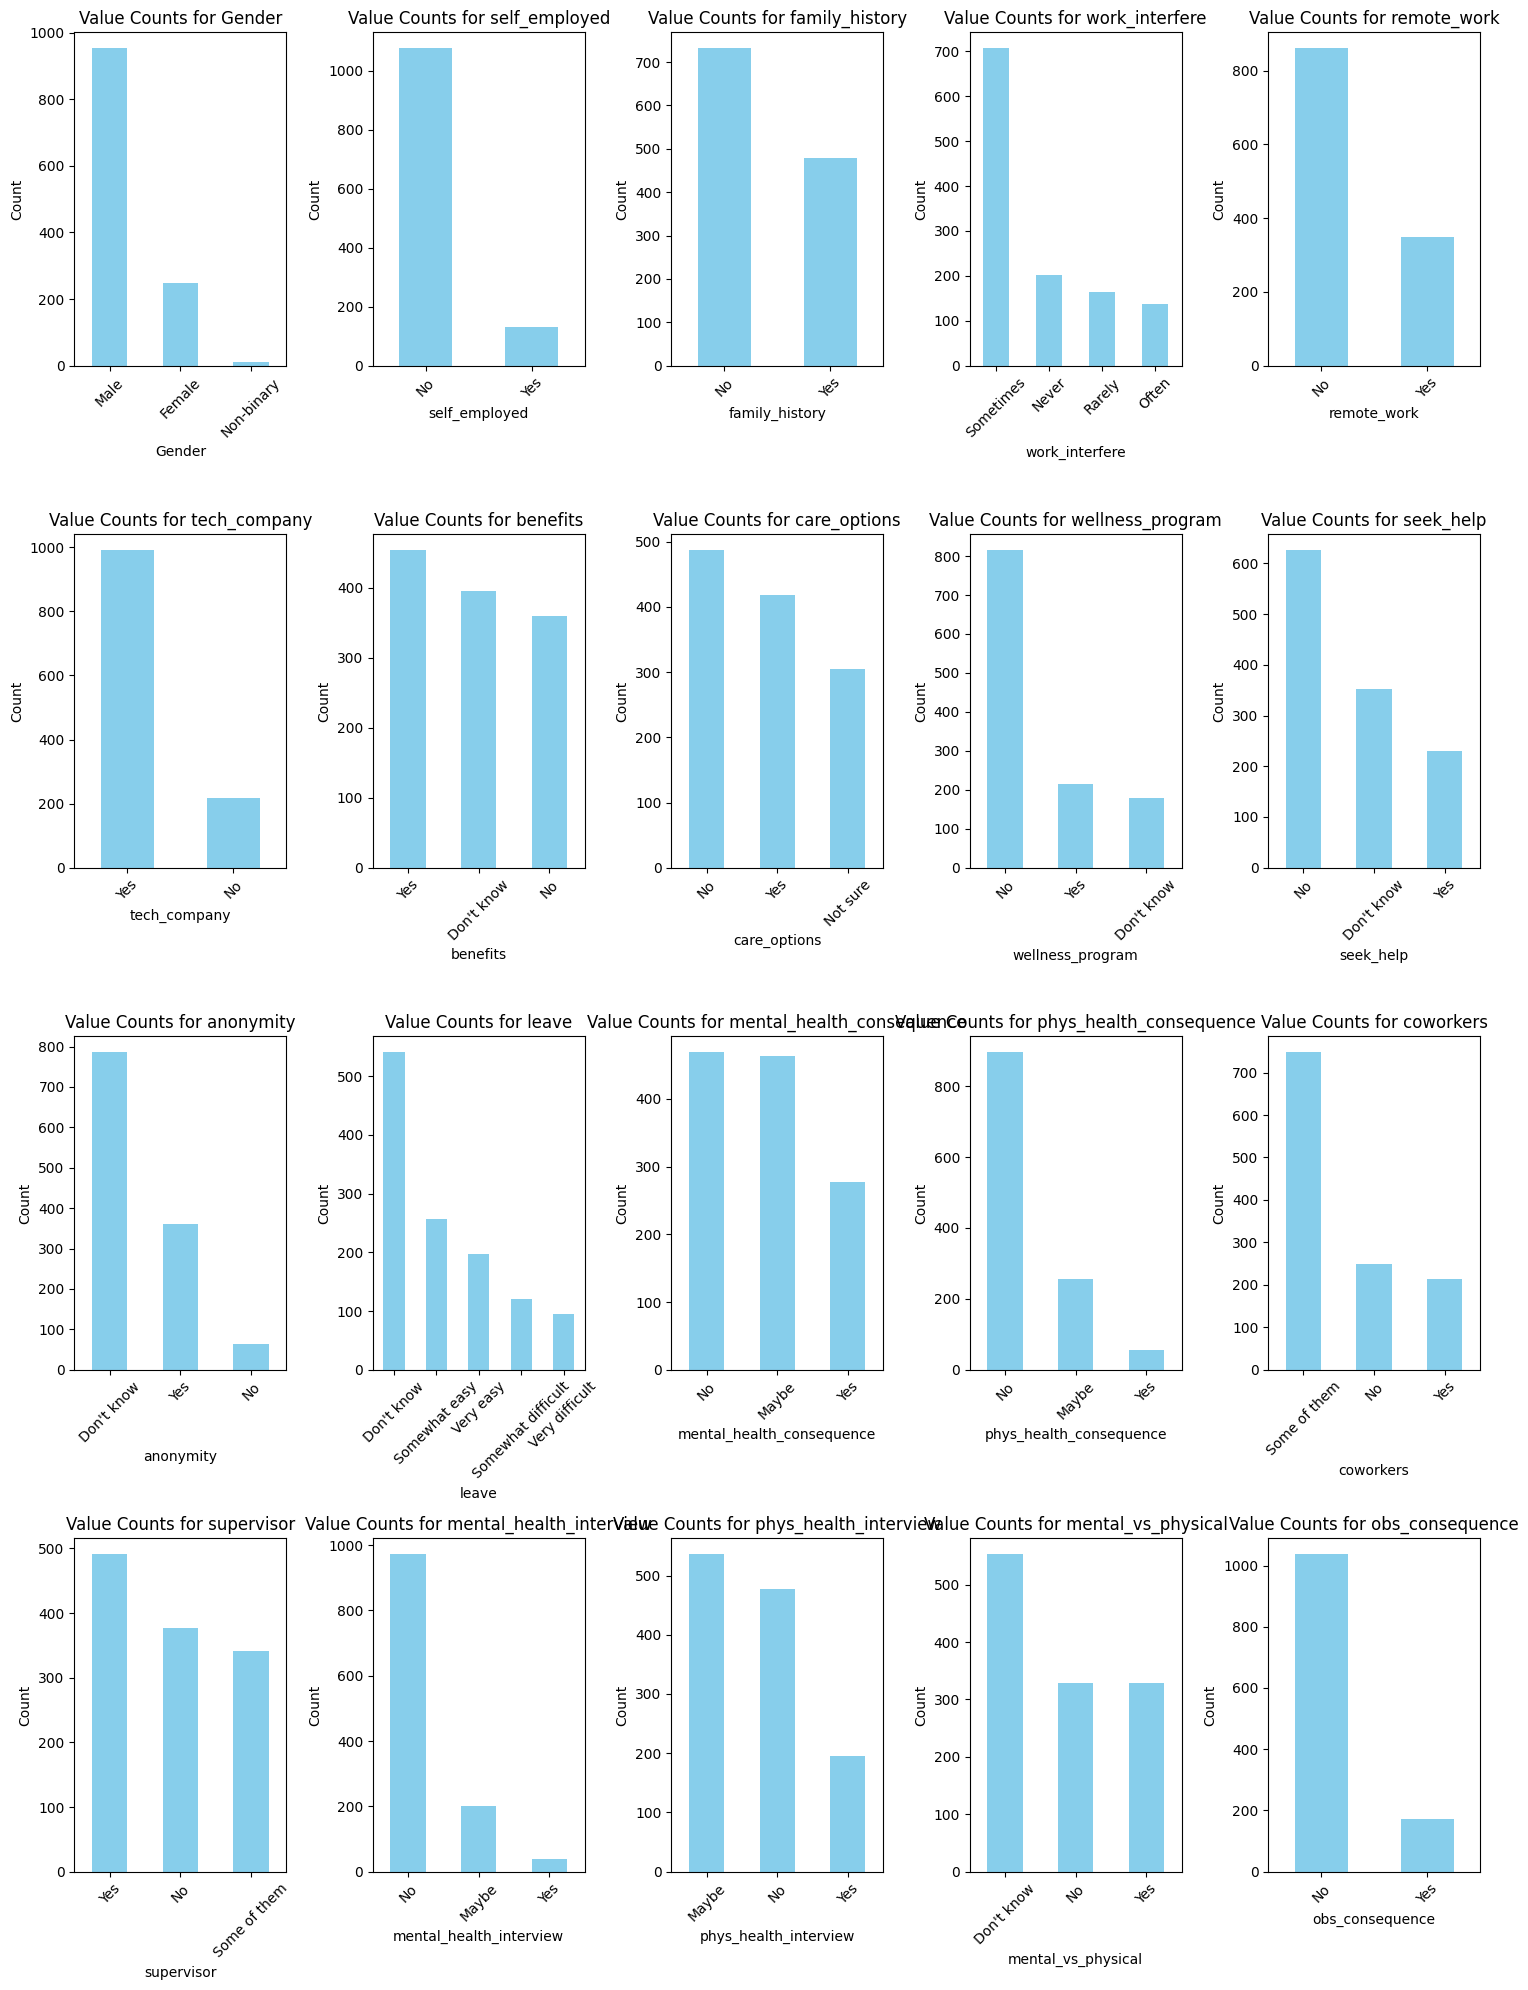

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 5
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Value Counts for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

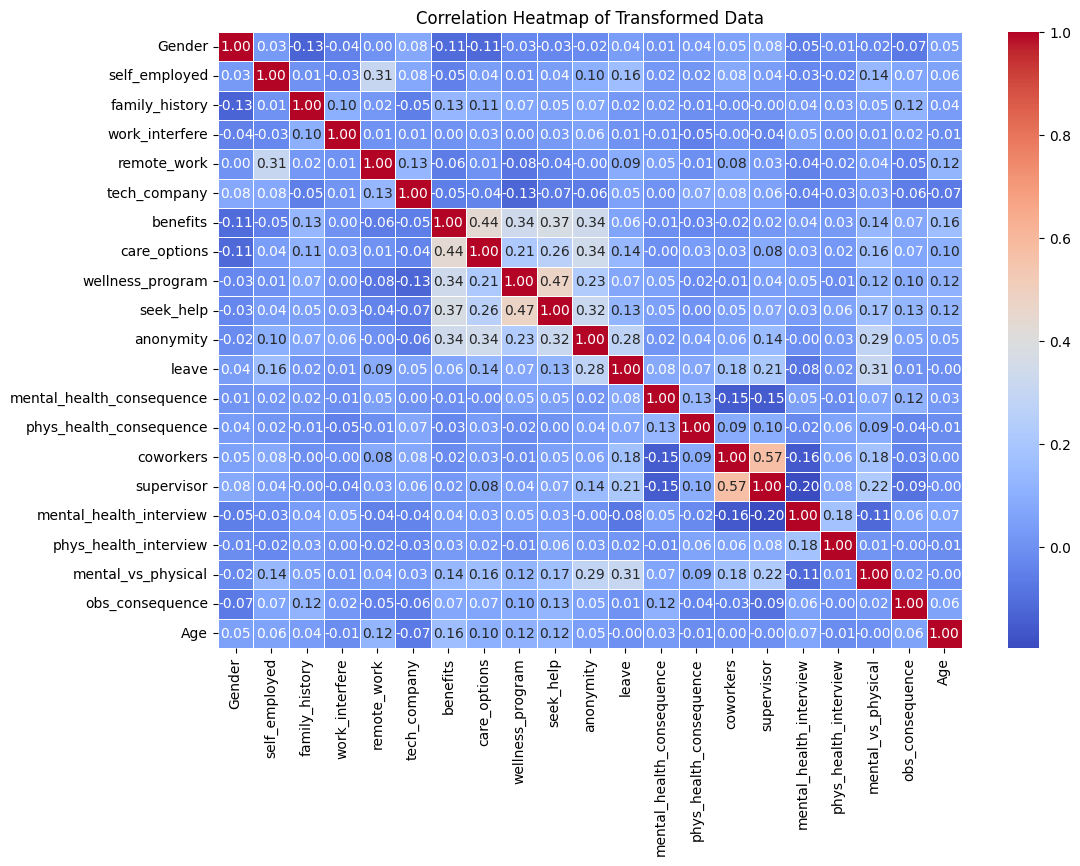

In [48]:
corr_matrix = transformed_df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title('Correlation Heatmap of Transformed Data')

plt.show()

<Figure size 700x500 with 0 Axes>

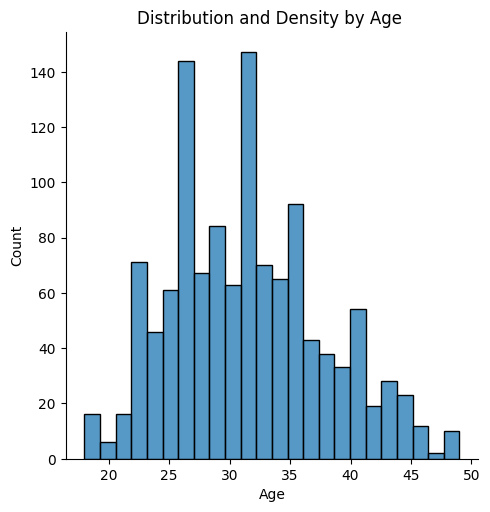

In [49]:
plt.figure(figsize=(7,5))
sns.displot(df['Age'],bins=24)
plt.title('Distribution and Density by Age ')
plt.xlabel('Age')
plt.show()

In [95]:
transformed_df.head()

,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,...,2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.612903
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.838710
2,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,0.451613
3,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.419355
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.419355


In [50]:
transformed_df.dtypes

Gender                       float64
self_employed                float64
family_history               float64
work_interfere               float64
remote_work                  float64
tech_company                 float64
benefits                     float64
care_options                 float64
wellness_program             float64
seek_help                    float64
anonymity                    float64
leave                        float64
mental_health_consequence    float64
phys_health_consequence      float64
coworkers                    float64
supervisor                   float64
mental_health_interview      float64
phys_health_interview        float64
mental_vs_physical           float64
obs_consequence              float64
Age                          float64
dtype: object

In [51]:
encoder = column_transformer.transformers_[0][1]
label2id = {}
for i, col in enumerate(categorical_columns):
    label2id[col] = dict(zip(encoder.categories_[i], range(len(encoder.categories_[i]))))
print(label2id)

{'Gender': {'Female': 0, 'Male': 1, 'Non-binary': 2}, 'self_employed': {'No': 0, 'Yes': 1}, 'family_history': {'No': 0, 'Yes': 1}, 'work_interfere': {'Never': 0, 'Often': 1, 'Rarely': 2, 'Sometimes': 3}, 'remote_work': {'No': 0, 'Yes': 1}, 'tech_company': {'No': 0, 'Yes': 1}, 'benefits': {"Don't know": 0, 'No': 1, 'Yes': 2}, 'care_options': {'No': 0, 'Not sure': 1, 'Yes': 2}, 'wellness_program': {"Don't know": 0, 'No': 1, 'Yes': 2}, 'seek_help': {"Don't know": 0, 'No': 1, 'Yes': 2}, 'anonymity': {"Don't know": 0, 'No': 1, 'Yes': 2}, 'leave': {"Don't know": 0, 'Somewhat difficult': 1, 'Somewhat easy': 2, 'Very difficult': 3, 'Very easy': 4}, 'mental_health_consequence': {'Maybe': 0, 'No': 1, 'Yes': 2}, 'phys_health_consequence': {'Maybe': 0, 'No': 1, 'Yes': 2}, 'coworkers': {'No': 0, 'Some of them': 1, 'Yes': 2}, 'supervisor': {'No': 0, 'Some of them': 1, 'Yes': 2}, 'mental_health_interview': {'Maybe': 0, 'No': 1, 'Yes': 2}, 'phys_health_interview': {'Maybe': 0, 'No': 1, 'Yes': 2}, 'men

In [57]:
y = df["treatment"].values
X = transformed_df.values

In [58]:
y.shape , X.shape

((1210,), (1210, 21))

In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled class distribution:', Counter(y_res))


Resampled class distribution: Counter({1: 608, 0: 608})


In [60]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_res , y_res , test_size=0.2 ,random_state=42)

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Classifiers to tune
classifiers = {
    "Logistic Regression": (LogisticRegression(), param_grid_lr),
    "Random Forest": (RandomForestClassifier(), param_grid_rf),
    "Gradient Boosting": (GradientBoostingClassifier(), param_grid_gb),
    "SVM (Support Vector Machine)": (SVC(probability=True), param_grid_svc),
    "K-Nearest Neighbors": (KNeighborsClassifier(), param_grid_knn),
    "Decision Tree": (DecisionTreeClassifier(), param_grid_dt),
    "Naive Bayes": (GaussianNB(), {})
}



In [69]:
type(X_train)

numpy.ndarray

In [84]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(
    X_train,  
    mode="classification",  
    feature_names=list(transformed_df.columns),  
     discretize_continuous=False  
    
)

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
import joblib
import pickle 
import json
import os
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             confusion_matrix, classification_report, roc_curve, auc)
from sklearn.model_selection import GridSearchCV

accuracy_scores = []
model_names = []
model_results = {}

for name, (clf, param_grid) in classifiers.items():
    print(f"Tuning and evaluating {name}...")

    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    if hasattr(best_model, "predict_proba"):
        y_probs = best_model.predict_proba(X_test)
        if len(set(y_test)) == 2:  
            roc_auc = roc_auc_score(y_test, y_probs[:, 1])
            fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])  
        else:  
            roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
            fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=None)  
    else:
        roc_auc = None
        fpr, tpr = None, None

    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    model_results[name] = {
        "best_params": grid_search.best_params_,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": conf_matrix.tolist(),
        "classification_report": class_report
    }

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC: Not applicable")
    print("=" * 50)

    if hasattr(best_model, "feature_importances_"):
        feature_importance = best_model.feature_importances_
    elif hasattr(best_model, "coef_"):
        feature_importance = np.abs(best_model.coef_).flatten()
    else:
        feature_importance = None

    if feature_importance is not None:
        feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(len(feature_importance))]
        importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
        importance_df = importance_df.sort_values(by="Importance", ascending=False)
        print(f"Feature Importances for {name}:")
        print(importance_df)
        os.makedirs("results", exist_ok=True)
        importance_df.to_csv(f"results/{name}_feature_importance.csv", index=False)

    

    # Save confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
    plt.title(f"Confusion Matrix for {name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    os.makedirs("confusion_matrices", exist_ok=True)
    plt.savefig(f"confusion_matrices/{name}_confusion_matrix.png")
    plt.close()

    # Save classification report plot
    plt.figure(figsize=(10, 6))
    class_report_dict = classification_report(y_test, y_pred, output_dict=True)
    class_report_df = pd.DataFrame(class_report_dict).transpose()
    ax = sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
    plt.title(f"Classification Report for {name}")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Classes")
    plt.tight_layout()
    os.makedirs("classification_reports", exist_ok=True)
    plt.savefig(f"classification_reports/{name}_classification_report.png")
    plt.close()

    # Save ROC-AUC curve plot if applicable
    if roc_auc is not None:
        plt.figure(figsize=(8, 6))
        if len(set(y_test)) == 2:  
            plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        else:   
            for i in range(len(set(y_test))):
                plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        os.makedirs("roc_auc_plots", exist_ok=True)
        plt.savefig(f"roc_auc_plots/{name}_roc_auc.png")
        plt.close()
    os.makedirs("models", exist_ok=True)
    joblib.dump(best_model, f"models/{name}_model.pkl")
    print(f"Generating LIME explanations for {name}...")
    sample_index = np.random.randint(0, len(X_test))
    sample_instance = X_test[sample_index]
    def predict_fn(X):
        return best_model.predict_proba(X)
    
    exp = explainer.explain_instance(
        X_test[sample_index],  
        predict_fn,  
        num_features=10  
    )

    os.makedirs("lime_explanations", exist_ok=True)
    exp.save_to_file(f"lime_explanations/{name}_lime_explanation.html")

    print(f"LIME explanation saved for {name} at 'lime_explanations/{name}_lime_explanation.html'")
with open("results/model_evaluation.json", "w") as f:
    json.dump(model_results, f, indent=4)
with open("pre_pocess/preprocessing_pipeline.pkl", "wb") as f:
    joblib.dump(pipeline, f)

print("All models evaluated and saved successfully.")


Tuning and evaluating Logistic Regression...
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.6926
Precision: 0.7076, Recall: 0.6926, F1-score: 0.6939
ROC-AUC: 0.7626
Feature Importances for Logistic Regression:
       Feature  Importance
2    Feature 2    1.281623
0    Feature 0    0.434353
19  Feature 19    0.418576
14  Feature 14    0.414139
6    Feature 6    0.382463
7    Feature 7    0.338039
15  Feature 15    0.241600
3    Feature 3    0.226248
16  Feature 16    0.188211
10  Feature 10    0.125793
20  Feature 20    0.106811
9    Feature 9    0.093943
8    Feature 8    0.093594
17  Feature 17    0.091839
12  Feature 12    0.091324
18  Feature 18    0.072083
13  Feature 13    0.071095
5    Feature 5    0.028199
11  Feature 11    0.027580
1    Feature 1    0.017983
4    Feature 4    0.003178
Generating LIME explanations for Logistic Regression...
LIME explanation saved for Logistic Regression at 'lime_explanations/Logistic Regression_lime_explanation.html'
Tuning and evalu